# Assignment 6: Multiple start local search (MSLS) and iterated local search (ILS)

- Łukasz Andryszewski 151930
- Filip Firkowski 151946

Link to the repository is: https://github.com/lucapl/Evolutionary-Computations.

In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd

from utils import *
from plotting import *
pd.set_option('display.max_colwidth', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Description of a problem:

The problem is about selecting exactly 50% of the nodes to form a Hamiltonian cycle that minimizes the total distance of the path and the total cost of the selected nodes.

In this report the candidate edges mechanism is evaluated. The goal being to speed up the steepest local search algorithm.

## Pseudocode of all implemented algorithms

<style>
  .no-page-break {
    page-break-inside: avoid;
  }
</style>

<div class="no-page-break">
  <h3>Multiple Start Local Search (MSLS):</h3>
  <pre>
function MultipleStartLocalSearch():
  bestSolution = null
  bestObjectiveValue = Infinity

  for i = 1 to numberOfStarts:
    initialSolution = createSolver().solve(randomStartingCity())
    localSolution = localSearch(initialSolution)

    currentObjectiveValue = localSolution.getObjectiveFunctionValue()
    if currentObjectiveValue < bestObjectiveValue:
      bestObjectiveValue = currentObjectiveValue
      bestSolution = localSolution

  return bestSolution
  </pre>
</div>

<div class="no-page-break">
  <pre>
function localSearch(solution):
  moveset = createMoveset()
  bestSolution = solution

  for i = 1 to MAX_LOCAL_SEARCH_ITERATIONS:
    bestMove = null
    bestMoveCost = Infinity

    for each move in moveset:
      moveCost = evaluateMove(solution, move)
      if moveCost < bestMoveCost:
        bestMoveCost = moveCost
        bestMove = move

    if bestMove is not null:
      solution.performMove(bestMove)
      
  return solution
  </pre>
</div>

<div class="no-page-break">
  <h3>Iterated Local Search (ILS):</h3>
  <pre>
function IteratedLocalSearch():
  initialSolution = createSolver().solve(randomStartingCity())
  bestSolution = localSearch(initialSolution)
  bestObjectiveValue = bestSolution.getObjectiveFunctionValue()

  for iteration = 1 to maxIterations:
    perturbedSolution = perturb(bestSolution)
    newSolution = localSearch(perturbedSolution)

    newObjectiveValue = newSolution.getObjectiveFunctionValue()
    if newObjectiveValue < bestObjectiveValue:
      bestSolution = newSolution
      bestObjectiveValue = newObjectiveValue
  
  return bestSolution

function perturb(solution):
  perturbedSolution = copy(solution)
  for i in perturbationSize:
    solution.remove(node)
    solution.add(node)
  return perturbedSolution
  </pre>
</div>


<style>
  table {
    width: 100%;
    table-layout: fixed;
    word-wrap: break-word;
  }
</style>

## Results of a computational experiments

In [4]:
solver_types = ["MultipleStartLocalSearch-random", "IteratedLocalSearch-random","localSearch-Steepest-Edges-Random","localSearch-Steepest-Edges-Heuristic"]
report_solvers = solver_types[:2]
instances = ['A', 'B']

all_json_data = load_all_json_data(solver_types)

table, best_solutions = get_best_solutions_and_vertical_table(solver_types,instances,all_json_data)

In [5]:
display_html(table,False)

Method,Instance A,Instance B
MultipleStartLocalSearch-random,71818.6 (71251.0-72536.0),46473.2 (45582.0-46952.0)
IteratedLocalSearch-random,69898.2 (69497.0-70193.0),44296.1 (43810.0-44974.0)
localSearch-Steepest-Edges-Random,73859.0 (71592.0-77932.0),48352.1 (45953.0-52260.0)
localSearch-Steepest-Edges-Heuristic,71349.0 (70163.0-72260.0),48164.3 (44806.0-51961.0)


<p style="page-break-after:always;"></p>

Table containing elapsed time in ms.

In [6]:
timeTable, _ = get_best_solutions_and_vertical_table(solver_types,instances,all_json_data,"elapsed time")

display_html(timeTable,False)

Method,Instance A,Instance B
MultipleStartLocalSearch-random,11299.8 (9935.6-13689.3),10167.7 (8842.7-12377.0)
IteratedLocalSearch-random,10065.6 (10052.6-10084.0),10070.9 (10053.6-10129.5)
localSearch-Steepest-Edges-Random,214.8 (168.8-523.4),203.6 (157.1-428.9)
localSearch-Steepest-Edges-Heuristic,31.3 (20.7-59.1),37.0 (21.6-304.6)


Table containing iterations of Iterated Local Search

In [ ]:
html_table = """
<table border="1">
    <thead>
        <tr>
            <th>Instance of Iterated Local Search</th>
            <th>Iterations</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>A</td>
            <td>576</td>
        </tr>
        <tr>
            <td>B</td>
            <td>597</td>
        </tr>
    </tbody>
</table>
"""

display(HTML(html_table))

Instance of IteratedLocalSearch,Iterations
A,576
B,597


## Best solutions:

The following solutions were checked with the solution checker.

In [7]:
print_solutions(report_solvers,instances,best_solutions)

Solver type: MultipleStartLocalSearch-random
                	Instance: A
                	City costs: 48960.0
                	Edge Length: 22291.0
                	Objective function: 71251.0
                	Solution:
[46, 68, 139, 115, 5, 42, 43, 116, 65, 131, 149, 123, 112, 4, 84, 35, 184, 10, 177, 54, 48, 160, 181, 34, 103, 146, 195, 22, 159, 41, 193, 18, 69, 108, 140, 93, 117, 0, 143, 183, 89, 23, 137, 148, 9, 62, 102, 144, 14, 49, 3, 178, 106, 52, 55, 57, 92, 78, 145, 179, 185, 40, 165, 27, 90, 81, 196, 31, 113, 175, 171, 16, 25, 44, 120, 82, 129, 2, 152, 1, 97, 26, 101, 75, 86, 53, 180, 154, 135, 162, 151, 133, 79, 63, 94, 80, 176, 51, 59, 118]
                	Solution length: 100
                	No repeats?: True
                	Starting from: 0
                	Elapsed Time: 10087.8674

                	Instance: B
                	City costs: 26192.0
                	Edge Length: 19390.0
                	Objective function: 45582.0
                	Solution:
[6, 147, 90,

## 2D visualizations:

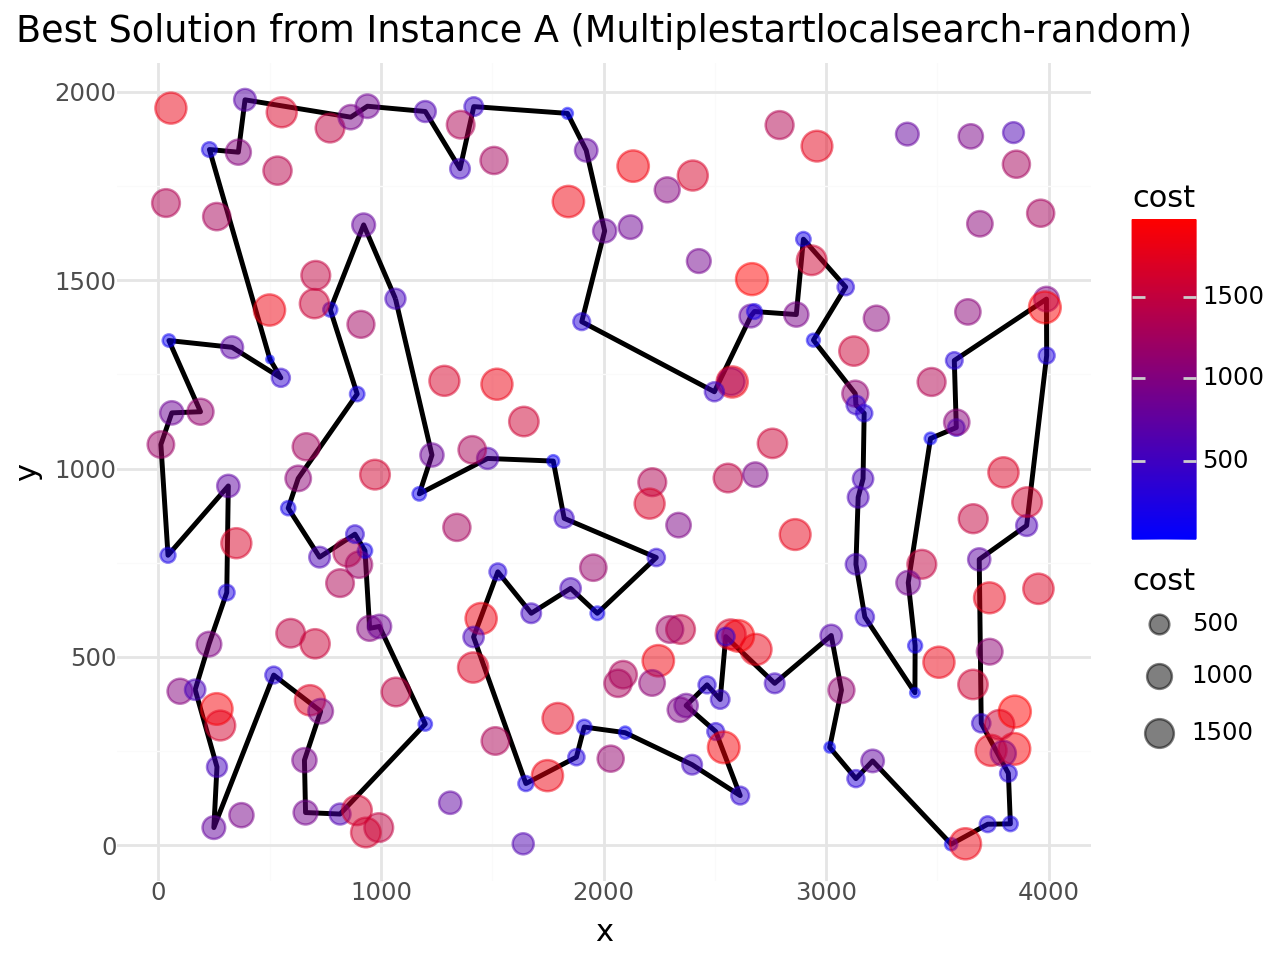

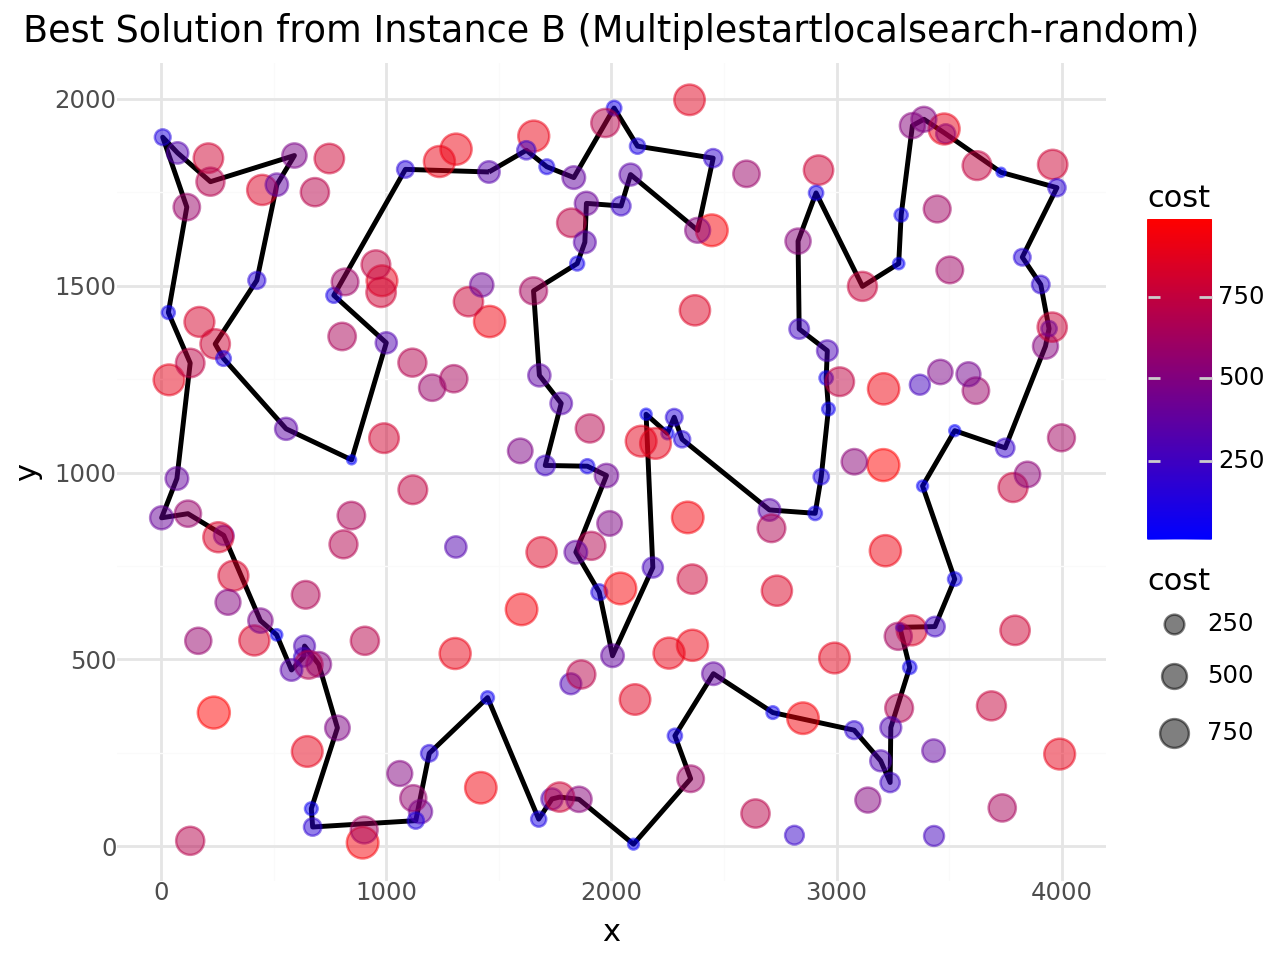

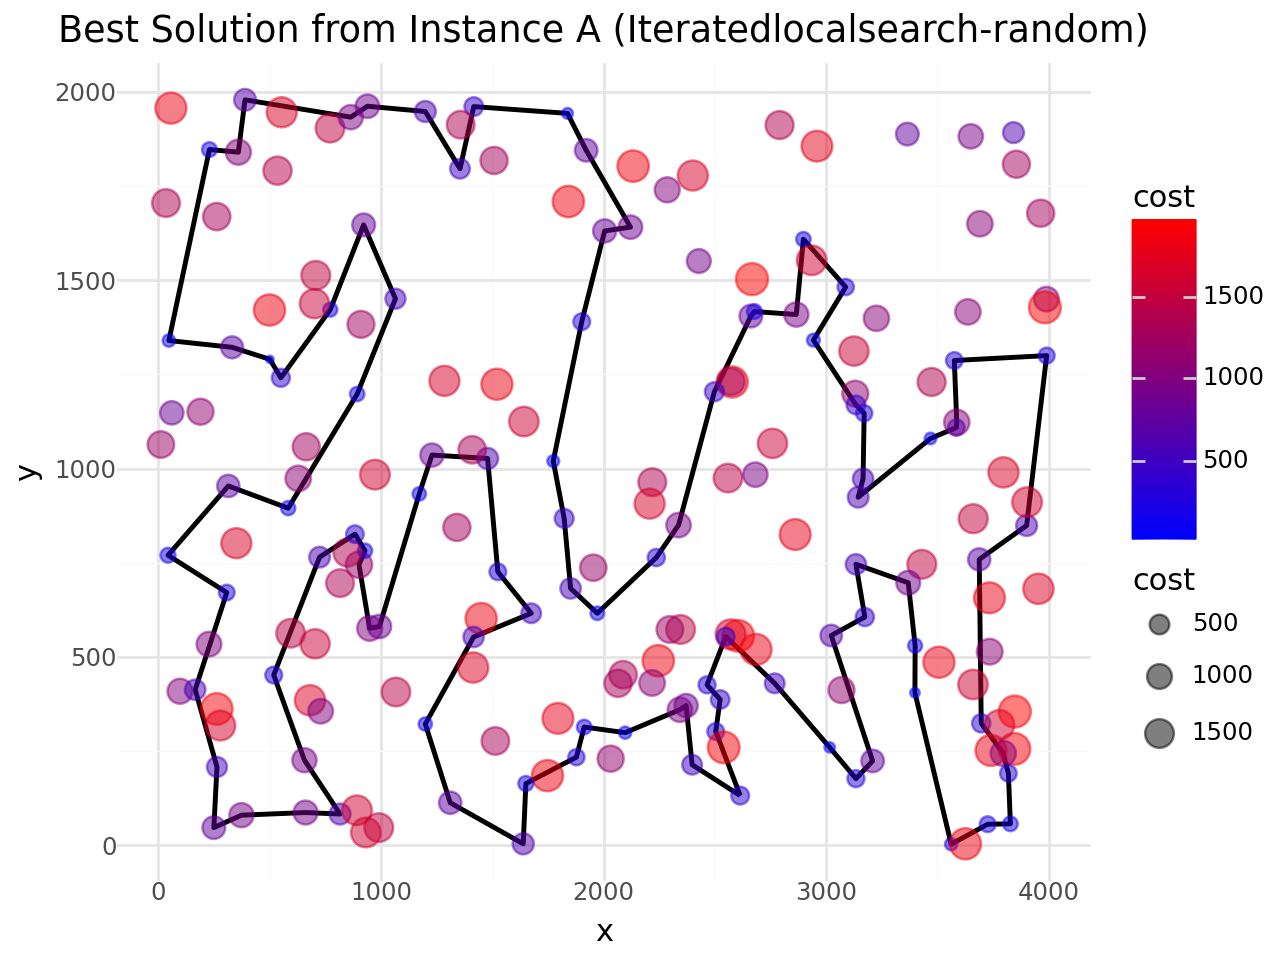

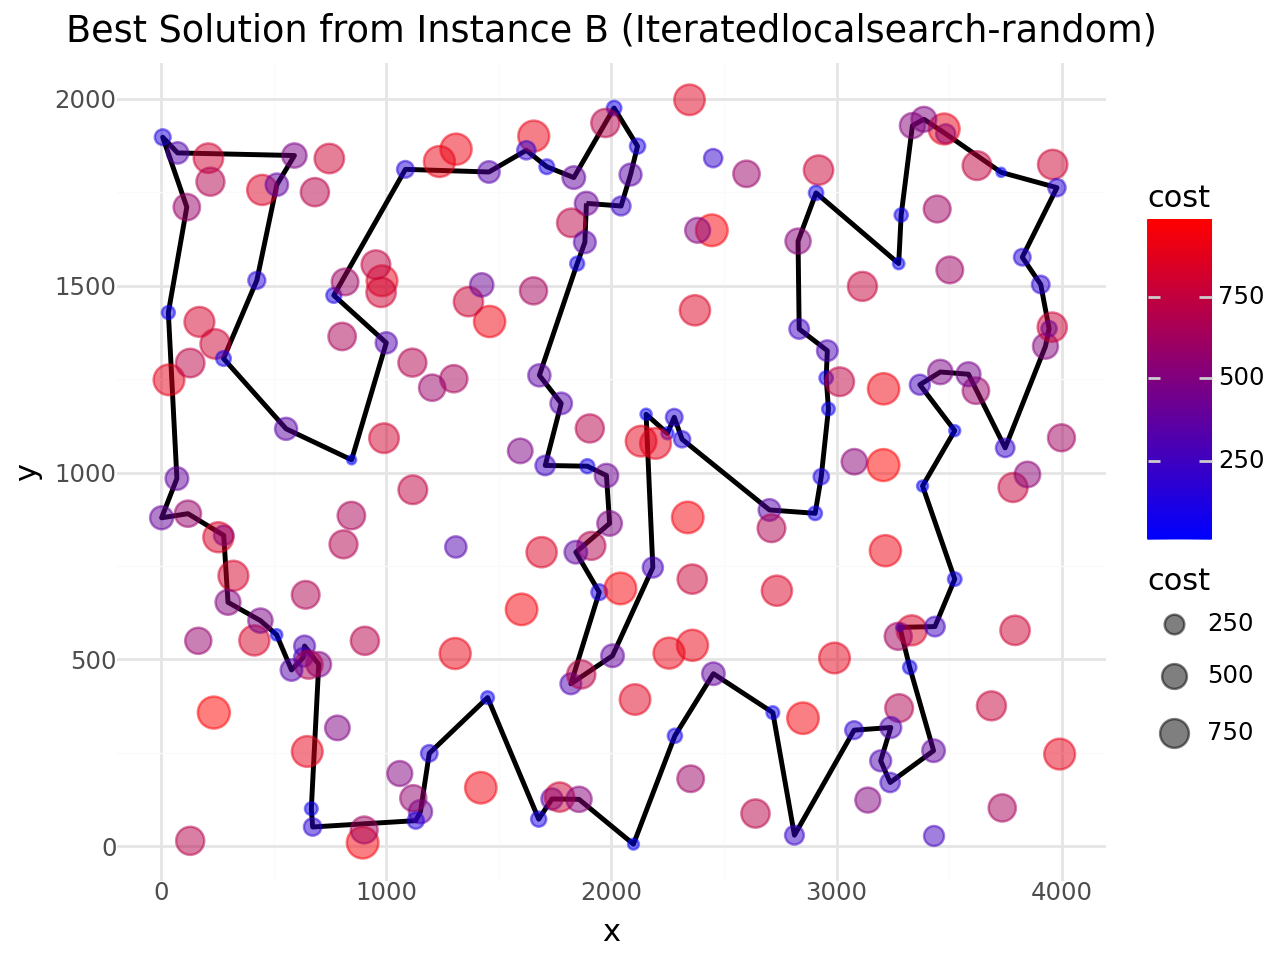

In [8]:
import warnings
warnings.filterwarnings("ignore")

coordinates = {
    'A': load_coordinates_from_csv('../src/main/resources/instances/TSPA.csv'),
    'B': load_coordinates_from_csv('../src/main/resources/instances/TSPB.csv')
}

plot_all(report_solvers, instances, coordinates, best_solutions)

<p style="page-break-after:always;"></p>

# Conclusions:

Multiple Start Local Search (MSLS) enhances solution quality by performing multiple independent local searches from different starting points, increasing the chances of avoiding local minima. However, it can be computationally expensive as the number of starts grows.

Iterated Local Search (ILS) improves a single solution through iterative perturbations and local searches, striking a balance between exploration and exploitation. The perturbation size and iteration count are key factors for optimal performance.

Both MSLS and ILS aim to overcome local minima issues, with MSLS being more effective for diverse solutions and ILS excelling in refining a single solution. They complement each other well: MSLS can provide good initial solutions for ILS to improve. Proper tuning of parameters like perturbation size and number of starts is crucial for achieving the best results. 

However, overall ILS performed better because its focused iterative refinement tends to yield higher-quality solutions in fewer iterations compared to MSLS, which requires a larger computational effort. The more concentrated exploration in ILS allowed it to converge more effectively toward optimal solutions.